<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()
print('Количество дубликатов: ', data.duplicated().sum())
data.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

При открытии файла пропущенные значения обнаружены в следующих столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 

Дублирующиеся строки не обнаружены.

## Предобработка данных

In [2]:
for c in data.columns:
    print(data[c].value_counts(dropna=False))


data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())


data.astype({'is_apartment': bool, 'balcony': int})

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,False,...,NaN,0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Предполагаю, что в столбцах balcony, parks_around3000, ponds_around3000 пропуски значений означают их отсутствие (нет балкона, нет парка и водоёма в радиусе 3 км), поэтому пропуски заменяем на 0.

В столбце is_apartment пропуск приравниваем к значению False, производим соостветствующую замену.

Пропуски в столбцах ceiling_height и floors_total заменяем медианными значениями.

Меняем тип данных в двух столбцах в соответствии с содержимым: is_apartment на bool и balcony на int.


## Расчёты и добавление результатов в таблицу

In [3]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data['first_exposition_day_of_week'] = data['first_day_exposition'].dt.weekday
data['first_exposition_month'] = data['first_day_exposition'].dt.month
data['first_exposition_year'] = data['first_day_exposition'].dt.year

def floor_category(column):
    if column['floor'] == 1:
        return 'первый'
    if column['floor'] == column['floors_total']:
        return 'последний'
    return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)

data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['last_price_mln'] = data['last_price'] / 1000000

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,square_meter_price,first_exposition_day_of_week,first_exposition_month,first_exposition_year,floor_category,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km,last_price_mln
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481,16.0,13.000
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277,19.0,3.350
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214,14.0,5.196
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,424.0,408176.100629,4,7,2015,другой,NaN,NaN,7.0,64.900
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0,10.000


## Исследовательский анализ данных

,total_area,last_price_mln,rooms,ceiling_height
total_area,1.000000,0.653675,0.758344,0.080613
last_price_mln,0.653675,1.000000,0.363343,0.064425
rooms,0.758344,0.363343,1.000000,0.047991
ceiling_height,0.080613,0.064425,0.047991,1.000000


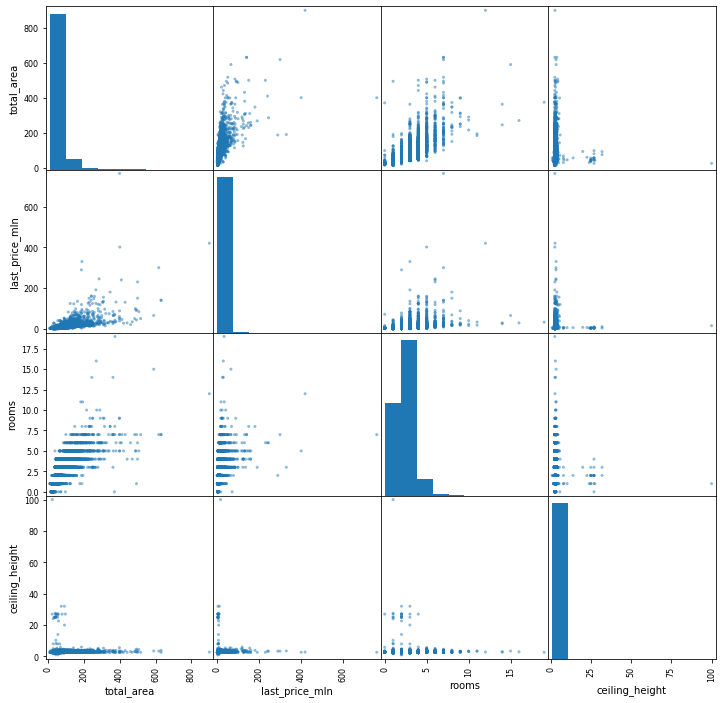

In [4]:
pd.plotting.scatter_matrix(data[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']], figsize=(12, 12))
data[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']].corr()


Проведена оценка корреляции следующих показателей: площадь, цена, число комнат, высота потолков. Установлено, что наиболее сильное влияние на стоимость квартир оказывает общая площадь квартиры. Также на цену влияет число комнат, однако корреляция не так сильна. Высота потолка на цену практически не влияет.

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

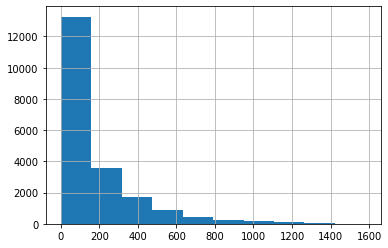

In [5]:
data['days_exposition'].hist()
data['days_exposition'].describe()

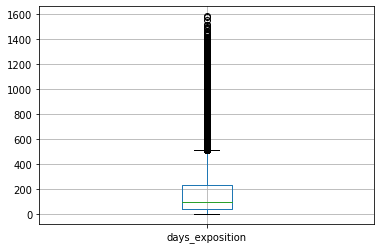

In [6]:
data[['days_exposition']].boxplot()

In [7]:
good_data = data.query('days_exposition < 1000')
good_data = good_data.query('last_price_mln < 200')

Удалены явные выбросы: объявления со сроком продажи более 1000 дней и стоимостью более 200 млн.

count    20232.000000
mean       167.327847
std        187.449705
min          1.000000
25%         44.000000
50%         93.000000
75%        222.000000
max        999.000000
Name: days_exposition, dtype: float64

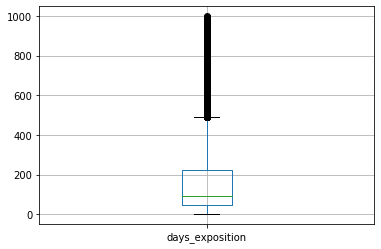

In [8]:
good_data[['days_exposition']].boxplot()
good_data['days_exposition'].describe()

Среднее время продажи - 93 дня. Необычайно быстрыми можно считать продажи быстрее 44 дней, долгими - дольше 222 дней.

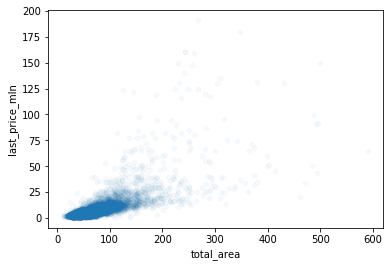

In [9]:
good_data[['last_price_mln', 'total_area']].plot(x='total_area', y='last_price_mln', kind='scatter', alpha=0.03)

Стоимость квартиры сильно зависит от общей площади: чем она больше, тем выше стоимость квартиры.

(0, 8)

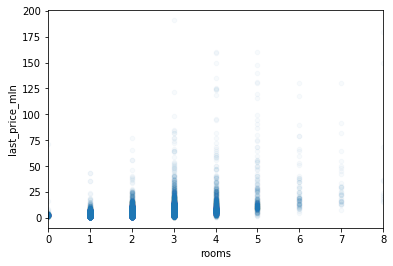

In [10]:
good_data[['last_price_mln', 'rooms']].plot(x='rooms', y='last_price_mln', kind='scatter', alpha=0.03)

plt.xlim(0, 8)

Количество комнат также влияет на стоимость жилья, но корреляция не так очевидна: в целом минимальная стоимость повышается с увеличением количества комнат, но при этом максимальная стоимость может быть одинакова как у квартиры с 3мя комнатами, так и с 7ю.

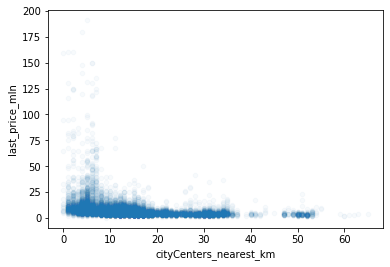

In [11]:
good_data[['last_price_mln', 'cityCenters_nearest_km']].plot(x='cityCenters_nearest_km', y='last_price_mln', kind='scatter', alpha=0.03)

Удалённость квартиры от центра города влияет на её стоимость, чем квартира дальше, тем дешевле.

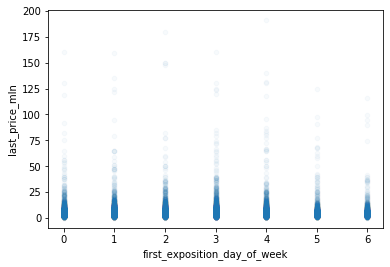

In [12]:
good_data[['last_price_mln', 'first_exposition_day_of_week']].plot(x='first_exposition_day_of_week', y='last_price_mln', kind='scatter', alpha=0.03)

День размещения объявления влияет на стоимость квартиры: цена на квартиры, объявления о продаже которых были размещены в субботу и воскресенье несколько ниже, а в четверг - выше всего.

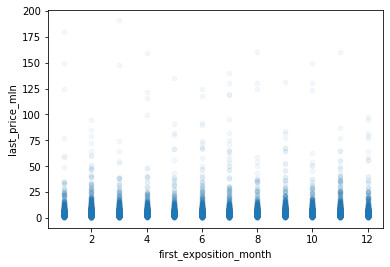

In [13]:
good_data[['last_price_mln', 'first_exposition_month']].plot(x='first_exposition_month', y='last_price_mln', kind='scatter', alpha=0.05)

В стоимости квартир прослеживается некая сезонность: цены на квартиры, выставленные на продажу в фервале и сентябре максимальны, а в летние месяцы и в январе наблюдается спад.

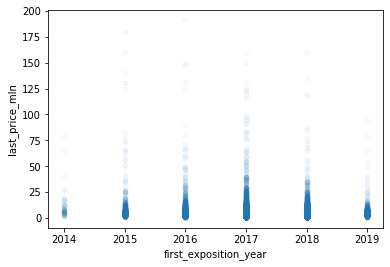

In [14]:
good_data[['last_price_mln', 'first_exposition_year']].plot(x='first_exposition_year', y='last_price_mln', kind='scatter', alpha=0.03)

Средняя стоимость менялась и по годам: постепенно росла, достигла пика в 2017, далее пошла на спад. При этом минимальная граница стоимости в 2019 была выше, чем в предыдущие годы.

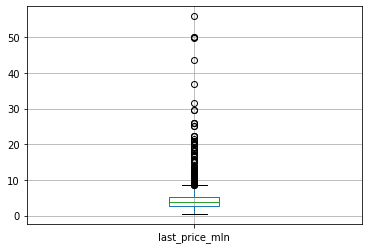

In [15]:
good_data.query('floor_category == "первый"')[['last_price_mln']].boxplot()

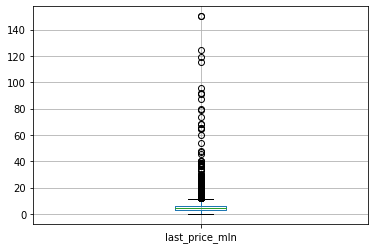

In [16]:
good_data.query('floor_category == "последний"')[['last_price_mln']].boxplot()

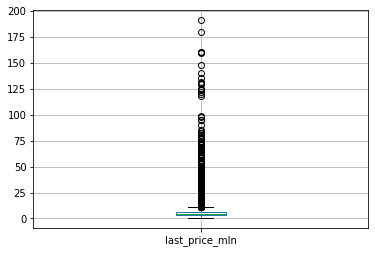

In [17]:
good_data.query('floor_category == "другой"')[['last_price_mln']].boxplot()

На стоимость квартиры также влияет и этаж: средняя стоимость на квартиры на первом этаже ниже, чем на последнем или других.

In [18]:
ten_cities = data['locality_name'].value_counts().head(10)
ten_cities

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [19]:
data_pivot = data[data['locality_name'].isin(ten_cities.index)].pivot_table(index ='locality_name', values='square_meter_price', aggfunc = 'mean')
data_pivot.sort_values(by='square_meter_price')

,square_meter_price
locality_name,
Выборг,58141.909153
Всеволожск,68654.473986
Гатчина,68746.146763
Колпино,75424.579098
посёлок Шушары,78677.364217
посёлок Мурино,85752.189195
посёлок Парголово,90175.913458
деревня Кудрово,92473.547576
Пушкин,103125.819291


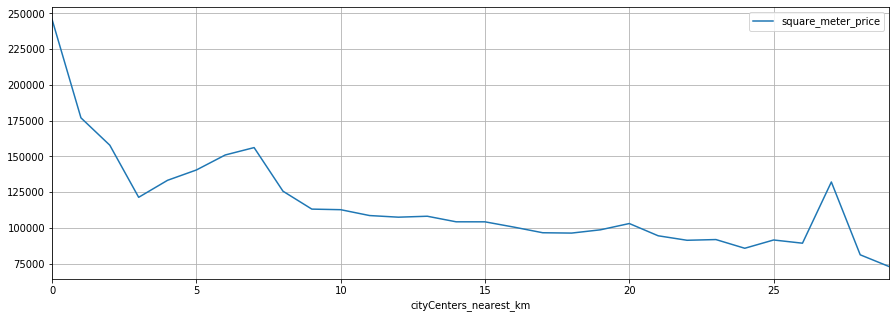

In [20]:
(data
     .query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='cityCenters_nearest_km', values='square_meter_price')
     .plot(grid=True, figsize=(15,5))
)

Основываясь на графике изменения цены в зависимости от удаления от центра выделим границу центра: 8 км. 

In [21]:
data_spb_center = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <=8')
data_spb_center = data_spb_center.query('last_price_mln < 200')

,total_area,last_price_mln,rooms,ceiling_height
total_area,1.000000,0.711890,0.746305,0.036557
last_price_mln,0.711890,1.000000,0.397107,0.042156
rooms,0.746305,0.397107,1.000000,0.022476
ceiling_height,0.036557,0.042156,0.022476,1.000000


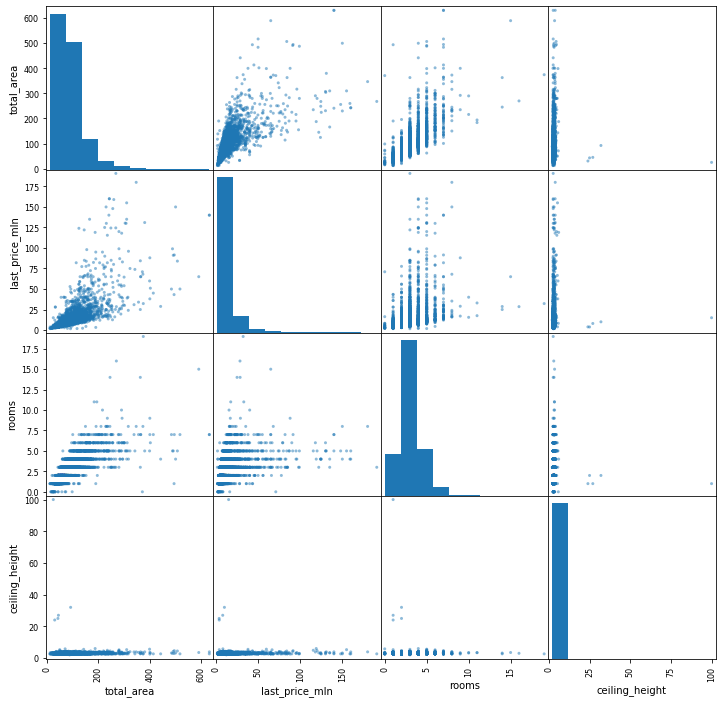

In [22]:
pd.plotting.scatter_matrix(data_spb_center[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']], figsize=(12, 12))
data_spb_center[['total_area', 'last_price_mln', 'rooms', 'ceiling_height']].corr()

На стоимость квартир в центре Петербурга сильно влияет общая площадь. Количество комнат также влияет, но не так сильно. Высота потолков практически не влияет на стоимость - по этим показателям картина не отличается от общей по городу.

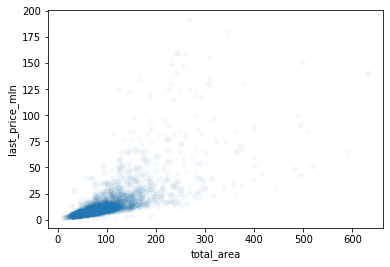

In [23]:
data_spb_center[['last_price_mln', 'total_area']].plot(x='total_area', y='last_price_mln', kind='scatter', alpha=0.03)

Стоимость квартиры зависит от общей площади: чем она больше, тем выше стоимость квартиры. Однако в центре города влияние площади на цену не столь велико, как в общем по городу.

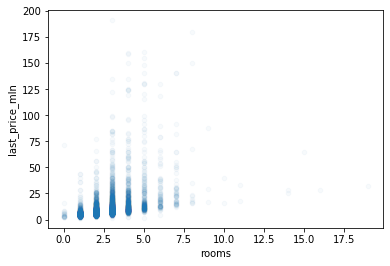

In [24]:
data_spb_center[['last_price_mln', 'rooms']].plot(x='rooms', y='last_price_mln', kind='scatter', alpha=0.03)

Как и в целом по городу, в центре количество комнат влияет на стоимость жилья, но корреляция не так очевидна: в целом минимальная стоимость повышается с увеличением количества комнат, но при этом максимальная стоимость может быть одинакова как у квартиры с 2мя комнатами, так и с 7ю.

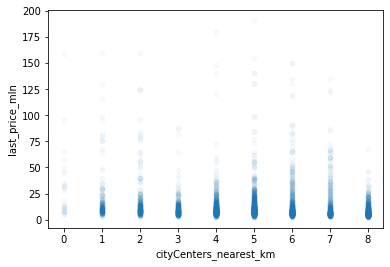

In [25]:
data_spb_center[['last_price_mln', 'cityCenters_nearest_km']].plot(x='cityCenters_nearest_km', y='last_price_mln', kind='scatter', alpha=0.03)

Стоимость квартир в центре Петербурга плавно уменьшается с удалением от центра - как в целом по городу.

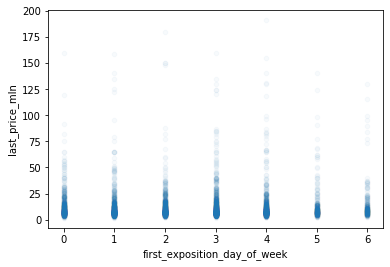

In [26]:
data_spb_center[['last_price_mln', 'first_exposition_day_of_week']].plot(x='first_exposition_day_of_week', y='last_price_mln', kind='scatter', alpha=0.03)

В целом распределение стоимости в зависимости от дня публикации выглядит примерно равномерным, однако днём с наибольшей средней ценой кажется четверг (как и в целом по городу), а в субботу и воскресенье публикаций было значительно меньше, чем в другие дни недели.

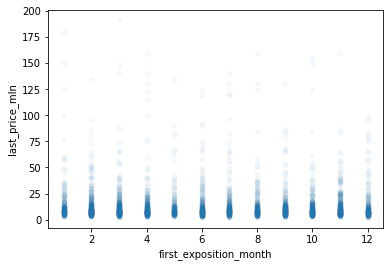

In [27]:
data_spb_center[['last_price_mln', 'first_exposition_month']].plot(x='first_exposition_month', y='last_price_mln', kind='scatter', alpha=0.03)

В стоимости квартир в центре Петербурга прослеживается та же сезонная закономерность, как в целом по городу: цены на квартиры, выставленные на продажу в фервале и сентябре максимальны, а в летние месяцы и в январе наблюдается спад.

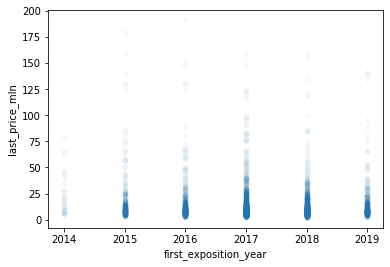

In [28]:
data_spb_center[['last_price_mln', 'first_exposition_year']].plot(x='first_exposition_year', y='last_price_mln', kind='scatter', alpha=0.03)

Пик продаж квартир в центре Петербурга пришёлся на 2017 год, однако, в отличие от динамики по городу в целом, их стоимость не менялась так кардинально.

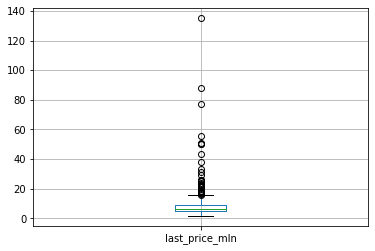

In [29]:
data_spb_center.query('floor_category == "первый"')[['last_price_mln']].boxplot()

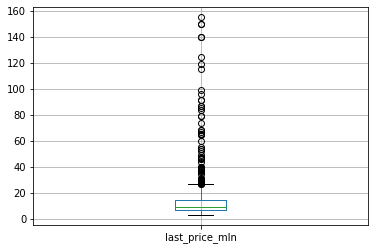

In [30]:
data_spb_center.query('floor_category == "последний"')[['last_price_mln']].boxplot()

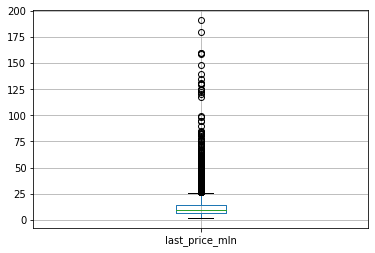

In [31]:
data_spb_center.query('floor_category == "другой"')[['last_price_mln']].boxplot()

В центре Петербурга зависимоть стоимость от этажа следующая: наибольшая средняя цена у квартир на других этажах (не первом и не последнем), наименьшая - на первом, в отличие от города в целом, где стоимость квартир на последнем и других этажах примерно одинакова и выше, чем на первом.

## Общий вывод

В ходе исследования было проанализировано влияние различных факторов на стоимость квартир в Санкт-Петербурге (и его ближайших пригородах) в целом и отдельно в центре города (в радиусе 3 км от центра). Ниже представлены характерные особенности, которые удалось выявить.

Среднее время продажи квартиры в Петербурге - 93 дня. Необычайно быстрыми можно считать продажи быстрее 44 дней, долгими - дольше 220 дней.

Фактором, наиболее сильно влияющим на стоимость жилья в Петербурге является площадь квартиры: чем она больше, тем квартира дороже. При этом в центре города влияние площади на цену не столь велико, как в общем по городу.

Количество комнат влияет на стоимость жилья, но корреляция не так очевидна, как с площадью: в целом минимальная стоимость повышается с увеличением количества комнат, но при этом максимальная стоимость может быть одинакова как у квартиры с 2мя комнатами, так и с 7ю. Высота потолка на цену практически не влияет.

На стоимость квартиры также влияет и этаж: средняя стоимость на квартиры на первом этаже ниже, чем на последнем или других. В центре Петербурга зависимоть стоимости от этажа следующая: наибольшая средняя цена у квартир на других этажах (не первом и не последнем), ниже - на последнем, наименьшая - на первом.

Стоимость квартир в Петербурге уменьшается с удалением от центра.

На стоимость квартир также влияет временя публикации объявления о продаже. В стоимости квартир прослеживается некая сезонность: цены на квартиры, выставленные на продажу в фервале и сентябре максимальны, а в летние месяцы и в январе наблюдается спад. Распределение стоимости в зависимости от дня публикации выглядит примерно равномерным, однако днём с наибольшей средней ценой кажется четверг, а в субботу и воскресенье публикаций было значительно меньше, чем в другие дни недели.

Средняя стоимость квартир в Петербурге менялась по годам (период наблюдения с 2014 по 2019): достигла пика в 2017, далее пошла на спад. При этом минимальная граница стоимости в 2019 была выше, чем в предыдущие годы.
Пик продаж квартир в центре Петербурга пришёлся на 2017 год, однако, в отличие от динамики по городу в целом, их стоимость не менялась так кардинально.

